In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
header = ["time", "alpha_air", "alpha_water", "qt", "rho_v_old", "rho_v", "rho_air", "rho_l", 
          "dm.air", "dm.water","pos.air", "neg.air","pos.water", "neg.water"]
header2 = ["time", "alpha_air", "alpha_water", "qt", "rho_v_old", "rho_v", "rho_air", "rho_l", 
          "dm.air", "dm.water","ndm.airNeg", "pos.air", "neg.air","pos.water", "neg.water"]
fname = "totalWater5.csv"
tw = pd.read_csv(fname, names=header2, index_col=0)

In [ ]:
tw["drho_v"] = np.zeros(tw.shape[0])
tw["drho_v"].iloc[1:] = tw["rho_v"].iloc[1:].values - tw["rho_v"].iloc[:-1].values
tw["drho_l"] = np.zeros(tw.shape[0])
tw["drho_l"].iloc[1:] = tw["rho_l"].iloc[1:].values - tw["rho_l"].iloc[:-1].values
tw["drho_air"] = np.zeros(tw.shape[0])
tw["drho_air"].iloc[1:] = tw["rho_air"].iloc[1:].values - tw["rho_air"].iloc[:-1].values
tw["dalpha_air"] = np.zeros(tw.shape[0])
tw["dalpha_air"].iloc[1:] = tw["alpha_air"].iloc[1:].values - tw["alpha_air"].iloc[:-1].values

tw["rho_t"] = np.zeros(tw.shape[0])
tw["rho_t"] = tw["rho_air"] + tw["rho_l"]

In [ ]:
tw.head()

In [ ]:
fig, axes = plt.subplots(figsize=(12,8), nrows=3, ncols=2)
for i, var in enumerate(["rho_t", "rho_v", "rho_l","dm.air", "pos.air", "neg.air"]) :
    axes.T.ravel()[i].plot(tw.index.values, tw[var]-tw[var].iloc[0])
    axes.T.ravel()[i].grid(True,'both','both')
    axes.T.ravel()[i].set(ylabel=var)
    
    # custom rules
    # if var == "qt":
    #     axes.T.ravel()[i].set(ylim=(-10**-10,10**-10))
fig.savefig(fname+".png")

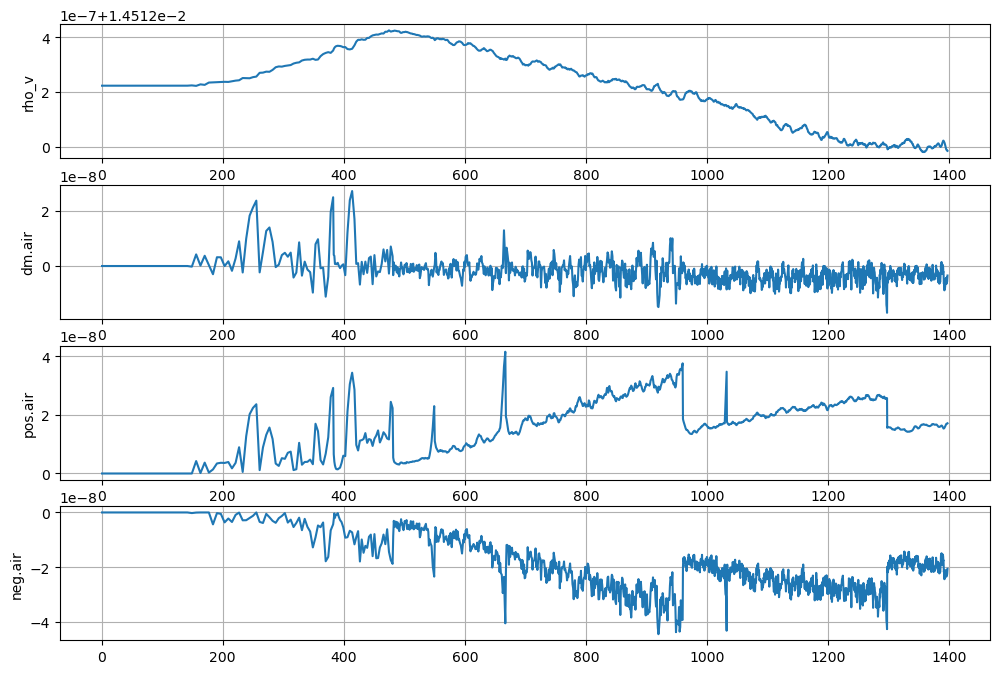

In [6]:
fig, axes = plt.subplots(figsize=(12,8), nrows=4)
for i, var in enumerate(["rho_v", "dm.air", "pos.air", "neg.air"]) :
    axes[i].plot(tw.index.values, tw[var])
    axes[i].grid(True,'both','both')
    axes[i].set(ylabel=var)

In [ ]:
t_range = slice(0, 10000)
tw_data = tw.loc[t_range,:]
fig, axes = plt.subplots(figsize=(12,6), nrows=1)
# varnames = ["drho_v", "drho_l", "drho_air", 'dm.air', 'dm.water', "pos.air", "neg.air", "pos.water", "neg.water"]
# varnames = ["drho_v", "drho_l", "drho_air","pos.air", "neg.air"]
varnames = {"drho_v" : "r-", 
            "drho_l" : "g", 
            "drho_air" : "b-.",
            "dm.air" : "k",
            "dm.water" : "k--"}
# c = ['r','b','g','k--','y--']
lines = list()
for i, var in enumerate(varnames.keys()):
    line, =axes.plot(tw_data.index.values, tw_data[var], varnames[var])
    lines.append(line)
    axes.grid(True,'both','both')
    axes.set(ylabel=var)
    axes.legend(lines, varnames)
axes.twinx().plot(tw_data.index.values, tw_data["ndm.airNeg"]/0.15, "ro",ms=1)

In [ ]:
tw_data = tw.loc[t_range,:]
fig, axes = plt.subplots(figsize=(12,6), nrows=1)
varnames = {
            "drho_v" : "r-", 
            "drho_air" : "b-",
            "dm.air" : "k--",
            }
# c = ['r','b','g','k--','y--']
lines = list()
for i, var in enumerate(varnames.keys()):
    line, =axes.plot(tw_data.index.values, tw_data[var], varnames[var])
    lines.append(line)
    axes.grid(True,'both','both')
    axes.set(ylabel=var)
    axes.legend(lines, varnames)
# axes.plot(tw_data.index.values, tw_data["pos.air"], "g--")
# axes.plot(tw_data.index.values, tw_data["neg.air"], "y--")

In [ ]:
tw_data = tw.loc[t_range,:]
fig, axes = plt.subplots(figsize=(12,6), nrows=1)
varnames = {
            "drho_l" : "r-", 
            "dm.water" : "k-",
            }
# c = ['r','b','g','k--','y--']
lines = list()
for i, var in enumerate(varnames.keys()):
    line, =axes.plot(tw_data.index.values, tw_data[var], varnames[var])
    lines.append(line)
    axes.grid(True,'both','both')
    axes.set(ylabel=var)
    axes.legend(lines, varnames)

In [ ]:
tw_data = tw.loc[t_range,:]
fig, axes = plt.subplots(figsize=(12,6), nrows=1)
varnames = {
            "alpha_air" : "r--", 
            }
# c = ['r','b','g','k--','y--']
lines = list()
for i, var in enumerate(varnames.keys()):
    line, =axes.plot(tw_data.index.values, tw_data[var], varnames[var])
    lines.append(line)
    axes.grid(True,'both','both')
    axes.set(ylabel=var)
    axes.legend(lines, varnames)
axes.twinx().plot(tw_data.index.values, tw_data["rho_air"]/tw_data["alpha_air"], "k--")